In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [5]:
model=np.polyfit(x,y,1)

In [6]:
model

array([ 0.64383562, 26.78082192])

In [7]:
predict=np.poly1d(model)
predict(65)

np.float64(68.63013698630135)

In [8]:
y_pred=predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [9]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.4803218090889323

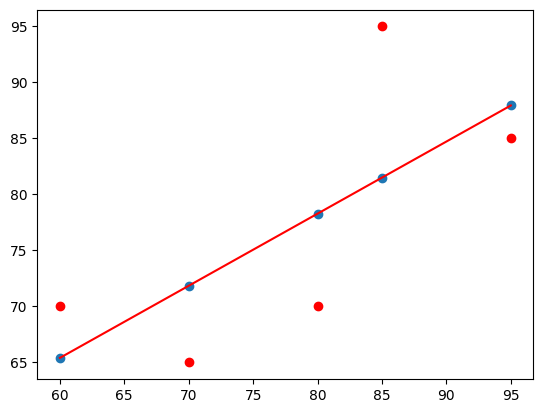

In [10]:
y_line=model[1]+model[0]*x
plt.plot(x,y_line,c='r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')

In [11]:
import numpy as np

In [12]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("HousingData.csv")

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [16]:
data.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [17]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [18]:
x = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=0)

In [20]:
import sklearn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()

In [23]:
model=lm.fit(xtrain, ytrain)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
import pandas as pd

# Combine xtrain and ytrain to drop rows with NaN in either
train_df = pd.concat([pd.DataFrame(xtrain), pd.Series(ytrain)], axis=1)
train_df.dropna(inplace=True)

# Split them back
xtrain_clean = train_df.iloc[:, :-1].values
ytrain_clean = train_df.iloc[:, -1].values

model = lm.fit(xtrain_clean, ytrain_clean)


In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
xtrain_imputed = imputer.fit_transform(xtrain)

model = lm.fit(xtrain_imputed, ytrain)


In [26]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming xtrain and xtest are pandas DataFrames
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on xtrain and transform both xtrain and xtest
xtrain_imputed = imputer.fit_transform(xtrain)
xtest_imputed = imputer.transform(xtest)

# Now fit the model and predict
lm = LinearRegression()
model = lm.fit(xtrain_imputed, ytrain)

ytrain_pred = lm.predict(xtrain_imputed)
ytest_pred = lm.predict(xtest_imputed)


In [28]:
# Convert back to DataFrame if needed
xtrain_imputed_df = pd.DataFrame(xtrain_imputed, columns=xtrain.columns)
xtest_imputed_df = pd.DataFrame(xtest_imputed, columns=xtest.columns)

model = lm.fit(xtrain_imputed_df, ytrain)
ytrain_pred = lm.predict(xtrain_imputed_df)
ytest_pred = lm.predict(xtest_imputed_df)


In [29]:
df=pd.DataFrame(ytrain_pred,ytrain)

In [30]:
df=pd.DataFrame(ytest_pred,ytest)

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
mse=mean_squared_error(ytest,ytest_pred)

In [33]:
print(mse)

34.99330686034018


In [34]:
mse=mean_squared_error(ytrain_pred,ytrain)

In [35]:
print(mse)


20.023850985554915


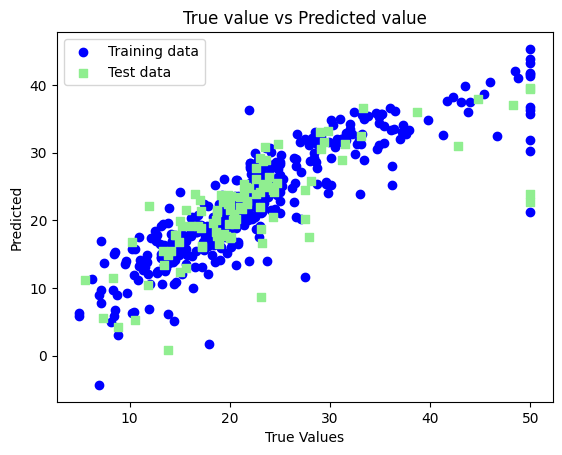

In [36]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')
plt.plot()
plt.show()